# Programming Exercise - K-means Clustering and Principal Component Analysis

In [25]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import linalg

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

## K-Means

In [2]:
data1 = loadmat('data/ex7data2.mat')
X1 = data1["X"]
print("X1: ", X1.shape)

X1:  (300, 2)


In [4]:
km1 = KMeans(3)
km1.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

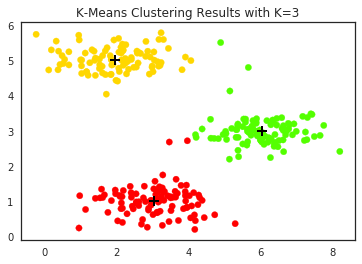

In [6]:
plt.scatter(X1[:,0], X1[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism)
plt.title("K-Means Clustering Results with K=3")
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

## Image compression with K-Means

In [8]:
img = plt.imread('data/bird_small.png')
img_shape = img.shape
img_shape

(128, 128, 3)

In [9]:
A = img/255
AA = A.reshape(128*128,3)
AA.shape

(16384, 3)

In [10]:
km2 = KMeans(16)
km2.fit(AA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
B = km2.cluster_centers_[km2.labels_].reshape(img_shape[0], img_shape[1], 3)

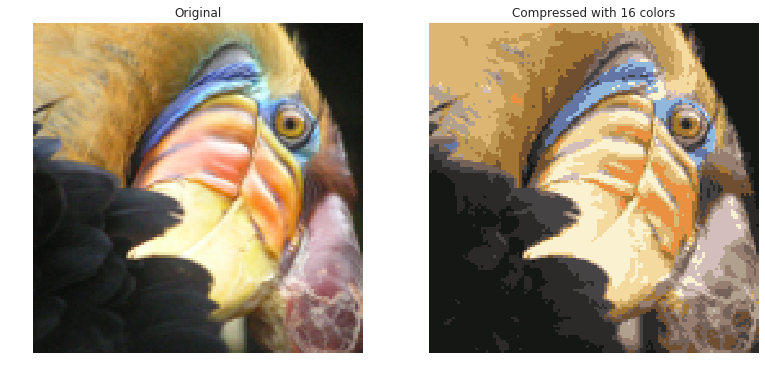

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,9))
ax1.imshow(img)
ax1.set_title("Original")
ax2.imshow(B*255)
ax2.set_title("Compressed with 16 colors")

for ax in fig.axes:
    ax.axis('off')

## PCA on example dataset

In [13]:
data2 = loadmat('data/ex7data1.mat')
X2 = data2["X"]
print("X2: ", X2.shape)

X2:  (50, 2)


In [21]:
scaler = StandardScaler()
scaler.fit(X2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
U, S, V = linalg.svd(scaler.transform(X2).T)
print(U)
print(V)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[[ 0.16062799 -0.09899537  0.13143756 ...,  0.13021369  0.03949686
  -0.15486642]
 [-0.20796227  0.07321697  0.10991088 ...,  0.35977595 -0.08978639
   0.01872531]
 [-0.14652229 -0.0837686   0.96994811 ..., -0.0639443   0.00769737
   0.01521929]
 ..., 
 [-0.19268034 -0.3352168  -0.05868388 ...,  0.844189    0.03017854
   0.01143763]
 [-0.02076673  0.09829793  0.0051223  ...,  0.02604669  0.99127302
   0.0063552 ]
 [ 0.14456323 -0.05031898  0.01832722 ...,  0.02071472  0.00425505
   0.97991733]]


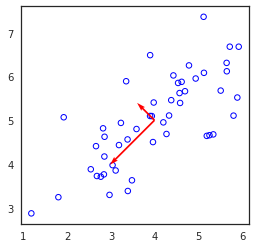

In [24]:
plt.scatter(X2[:,0], X2[:,1], s=30, edgecolors='b',facecolors='None', linewidth=1);

plt.gca().set_aspect('equal')
plt.quiver(scaler.mean_[0], scaler.mean_[1], U[0,0], U[0,1], scale=S[1], color='r')
plt.quiver(scaler.mean_[0], scaler.mean_[1], U[1,0], U[1,1], scale=S[0], color='r')